In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from textwrap import wrap
import matplotlib.ticker as ticker
from matplotlib.colors import TwoSlopeNorm
from matplotlib import font_manager as fm
import seaborn as sns
import scienceplots
plt.style.use(['science', 'no-latex'])



In [3]:
def get_percent_error(vals, val_true):
    return 100*(vals - val_true)/val_true


def remove_trailing_zeros(x, pos):
    # Format the number with a fixed number of decimals, then strip trailing zeros
    s = f"{x:.3f}"  # or use a different precision if you prefer
    s = s.rstrip("0").rstrip(".")
    return s

In [16]:
D_ref = 0.0512
times_new_roman = fm.FontProperties(family="Times New Roman", size=32)


In [22]:
# EH
D_EH_avg = np.load('D_EH_avg.npz')
D_EH_avg_data = D_EH_avg['D_EH_avg']

D_EH = np.load('D_EH_all.npz')
D_EH_keys = [key for key in D_EH.keys()]
D_EH_data = D_EH['D_EH_all']
D_EH_t = D_EH['t_array']
D_EH_t_delay = D_EH['t_delay_indices']
D_EH_t_delay_times = D_EH_t_delay * 0.002 * D_ref



# GK 
D_GK_avg = np.load('D_GK_avg.npz')
D_GK_avg_data = D_GK_avg['D_GK_avg']
D_GK = np.load('D_GK_all.npz')
D_GK_keys = [key for key in D_GK.keys()]
D_GK_data = D_GK['D_GK_all']
D_GK_t = D_GK['t_array']
D_GK_t_delay = D_GK['t_delay_indices'] 
D_GK_t_delay_times = D_GK_t_delay * 0.002 * D_ref


# EES
D_EES_avg = np.load('D_EES_avg.npz')
D_EES_avg_data = D_EES_avg['D_EES_avg']
D_EES = np.load('D_EES_all.npz')
D_EES_keys = [key for key in D_EES.keys()]
D_EES_data = D_EES['D_EES_all']
D_EES_t = D_EES['t_array']
D_EES_t_delay = D_EES['t_delay_indices'] 
D_EES_t_delay_times = D_EES_t_delay * 0.002 * D_ref

D_EES_error = get_percent_error(D_EES_data, D_ref)
D_EES_error_avg = np.mean(D_EES_error, axis=0)
D_EES_error_std = np.std(D_EES_error, axis=0)

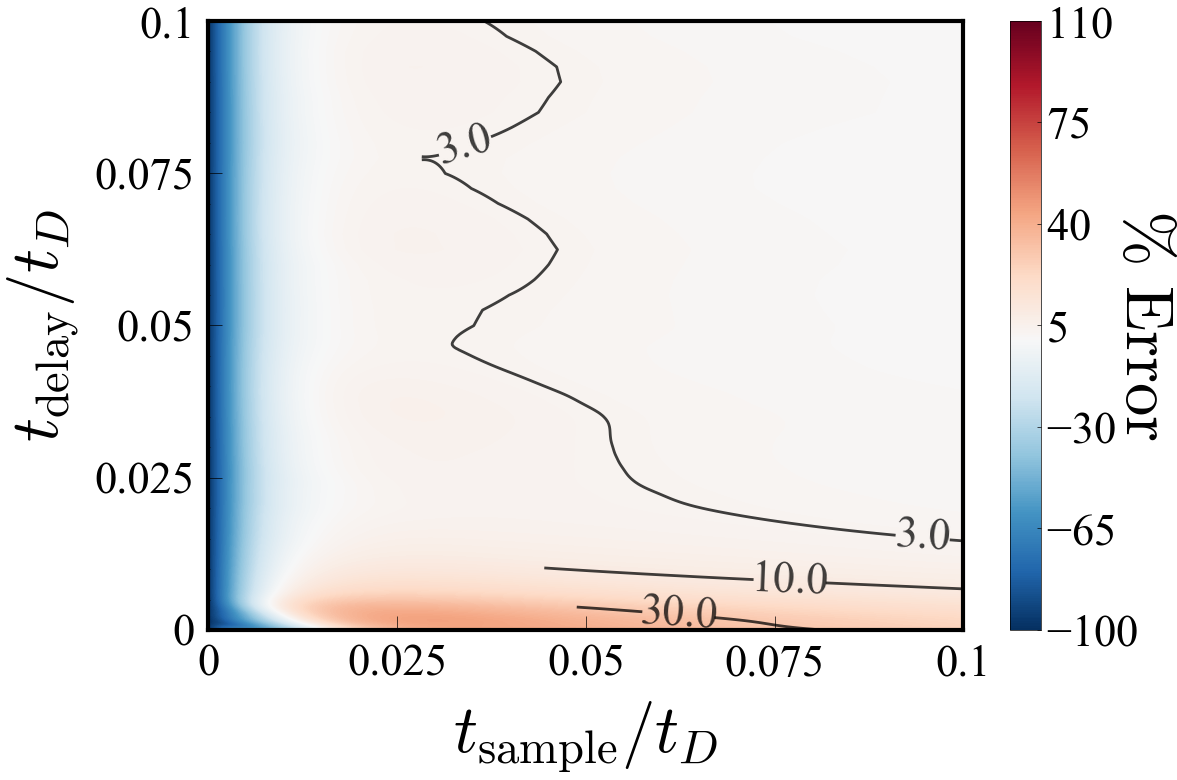

In [18]:
max_idx = np.ceil(np.argmin(np.abs(D_EH_t - .1))).astype(int)
max_delay_idx = np.ceil(np.argmin(np.abs(D_EH_t_delay_times - .1))).astype(int)
time_series = D_EH_t[:max_idx+1]
D_EH_err = 100 * (D_EH_avg_data - D_ref) / D_ref
vals = D_EH_err[:max_delay_idx+1, :max_idx+1]

# Create a meshgrid for the contour plot
X, Y = np.meshgrid(time_series, D_EH_t_delay_times[:max_delay_idx+1])


max_val = 110
min_val = -100

intercept = 1.5*0.0512
slope = -1.5
masked_vals = np.ma.masked_where(Y <= slope * X + intercept, vals)
masked_vals = np.ma.masked_where(X <= .0512*.55, masked_vals)




# Plot the contour plot
plt.figure(figsize=(12, 8))
color_norm = TwoSlopeNorm(vmin=min_val, vcenter=0, vmax=max_val)  # Center at 0

# Filled contours
contour_filled = plt.contourf(X, Y, vals, levels=np.linspace(min_val, max_val, 1000), norm=color_norm, cmap='RdBu_r')

# Add contour lines
# custom_levels = [3] + [con for con in np.linspace(3.5, 20, 200)] + [21, 22, 23, 24, 25, 30]
custom_levels = [3, 10, 30]
contour_lines = plt.contour(X, Y, masked_vals, levels=custom_levels, colors='black', linewidths=2, linestyles='solid', alpha=0.75)

c_lines = plt.clabel(contour_lines, inline=True, fontsize=32, fmt="%.1f", colors='black') #, manual=label_positions)

for text in c_lines:
    text.set_fontproperties(times_new_roman)

# Add color bar
cbar = plt.colorbar(contour_filled)
cbar.set_label(r"$\mathrm{\% \ Error}$", rotation=270, labelpad=25, fontsize=48)
# Place colorbar label at top of colorbar given specific coords 
cbar.set_ticks(np.linspace(-100, 110, 7))  # Use dynamic ticks
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(times_new_roman)

# Axis labels and title
plt.xlabel(r"$t_{\mathrm{sample}}/t_D$", fontsize=48, labelpad=10)
plt.ylabel(r"$t_{\mathrm{delay}}/t_D$", fontsize=48, labelpad=10)
title = r'% Error in Estimation of Self-Diffusivity as a Function of Start and Sample Time via EH'
wrapped_title = '\n'.join(wrap(title, width=50))

# plt.title(wrapped_title, fontsize=30, pad=10, fontweight='bold')

# Adjust ticks
plt.yticks(np.arange(0, .125, .025), fontsize=32)
plt.xticks(np.arange(0, .125, .025), fontsize=32)
# Add 10 padding to both ticks 
plt.tick_params(axis='x', direction='in', pad=10, length=10)
plt.tick_params(axis='y', direction='in', pad=10, length=10)

# Make the tick fonts the same font as the labels 
plt.xticks(fontname='Times New Roman')
plt.yticks(fontname='Times New Roman')



ax = plt.gca()

ax.xaxis.set_major_formatter(ticker.FuncFormatter(remove_trailing_zeros))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(remove_trailing_zeros))


plt.xlim(0, .1)
plt.ylim(0, .1)

# Remove top and right ticks
ax.yaxis.set_ticks_position('left')

ax.xaxis.set_ticks_position('bottom')



for spine in ax.spines.values():
    spine.set_linewidth(3)

plt.tight_layout()
# plt.savefig('Error_GK.png', dpi=450, format='png')


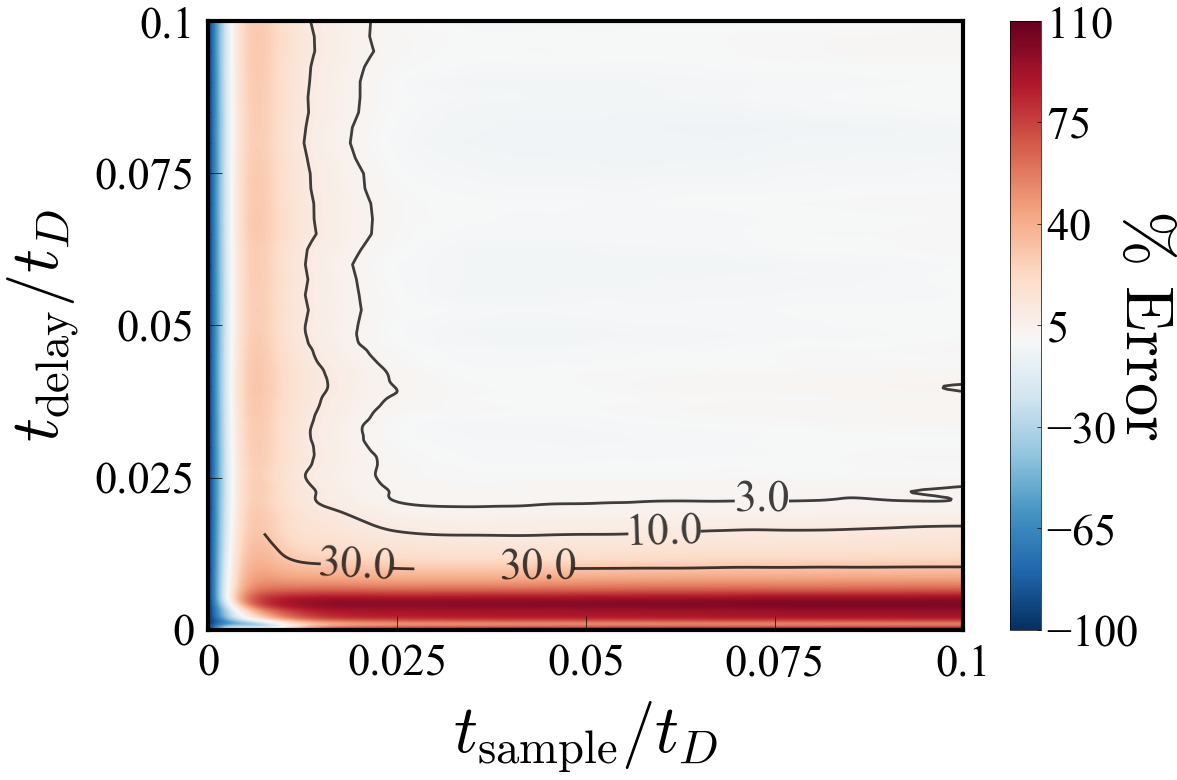

In [27]:
max_idx = np.ceil(np.argmin(np.abs(D_GK_t - .1))).astype(int)
max_delay_idx = np.ceil(np.argmin(np.abs(D_GK_t_delay_times - .1))).astype(int)
time_series = D_GK_t[:max_idx+1]
D_GK_err = 100 * (3*D_GK_avg_data - D_ref) / D_ref
vals = D_GK_err[:max_delay_idx+1, :max_idx+1]

# Create a meshgrid for the contour plot
X, Y = np.meshgrid(time_series, D_GK_t_delay_times[:max_delay_idx+1])


max_val = 110
min_val = -100

bools = np.logical_or(X <= 0.14*0.0512, Y <= (0.2 - 0.2*X)*0.0512)
bools = np.logical_or(bools, Y <= 0.1*0.0512)
bools = np.logical_or(bools, Y >= -0.75*X+0.13)
masked_vals = np.ma.masked_where(bools, vals)




# Plot the contour plot
plt.figure(figsize=(12, 8))
color_norm = TwoSlopeNorm(vmin=min_val, vcenter=0, vmax=max_val)  # Center at 0

# Filled contours
contour_filled = plt.contourf(X, Y, vals, levels=np.linspace(min_val, max_val, 1000), norm=color_norm, cmap='RdBu_r')

# Add contour lines
# custom_levels = [3] + [con for con in np.linspace(3.5, 20, 200)] + [21, 22, 23, 24, 25, 30]
custom_levels = [3, 10, 30]
contour_lines = plt.contour(X, Y, masked_vals, levels=custom_levels, colors='black', linewidths=2, linestyles='solid', alpha=0.75)

c_lines = plt.clabel(contour_lines, inline=True, fontsize=32, fmt="%.1f", colors='black') #, manual=label_positions)

for text in c_lines:
    text.set_fontproperties(times_new_roman)

# Add color bar
cbar = plt.colorbar(contour_filled)
cbar.set_label(r"$\mathrm{\% \ Error}$", rotation=270, labelpad=25, fontsize=48)
# Place colorbar label at top of colorbar given specific coords 
cbar.set_ticks(np.linspace(-100, 110, 7))  # Use dynamic ticks
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(times_new_roman)

# Axis labels and title
plt.xlabel(r"$t_{\mathrm{sample}}/t_D$", fontsize=48, labelpad=10)
plt.ylabel(r"$t_{\mathrm{delay}}/t_D$", fontsize=48, labelpad=10)
title = r'% Error in Estimation of Self-Diffusivity as a Function of Start and Sample Time via EH'
wrapped_title = '\n'.join(wrap(title, width=50))

# plt.title(wrapped_title, fontsize=30, pad=10, fontweight='bold')

# Adjust ticks
plt.yticks(np.arange(0, .125, .025), fontsize=32)
plt.xticks(np.arange(0, .125, .025), fontsize=32)
# Add 10 padding to both ticks 
plt.tick_params(axis='x', direction='in', pad=10, length=10)
plt.tick_params(axis='y', direction='in', pad=10, length=10)

# Make the tick fonts the same font as the labels 
plt.xticks(fontname='Times New Roman')
plt.yticks(fontname='Times New Roman')



ax = plt.gca()

ax.xaxis.set_major_formatter(ticker.FuncFormatter(remove_trailing_zeros))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(remove_trailing_zeros))


plt.xlim(0, .1)
plt.ylim(0, .1)

# Remove top and right ticks
ax.yaxis.set_ticks_position('left')

ax.xaxis.set_ticks_position('bottom')



for spine in ax.spines.values():
    spine.set_linewidth(3)

plt.tight_layout()
# plt.savefig('Error_GK.png', dpi=450, format='png')


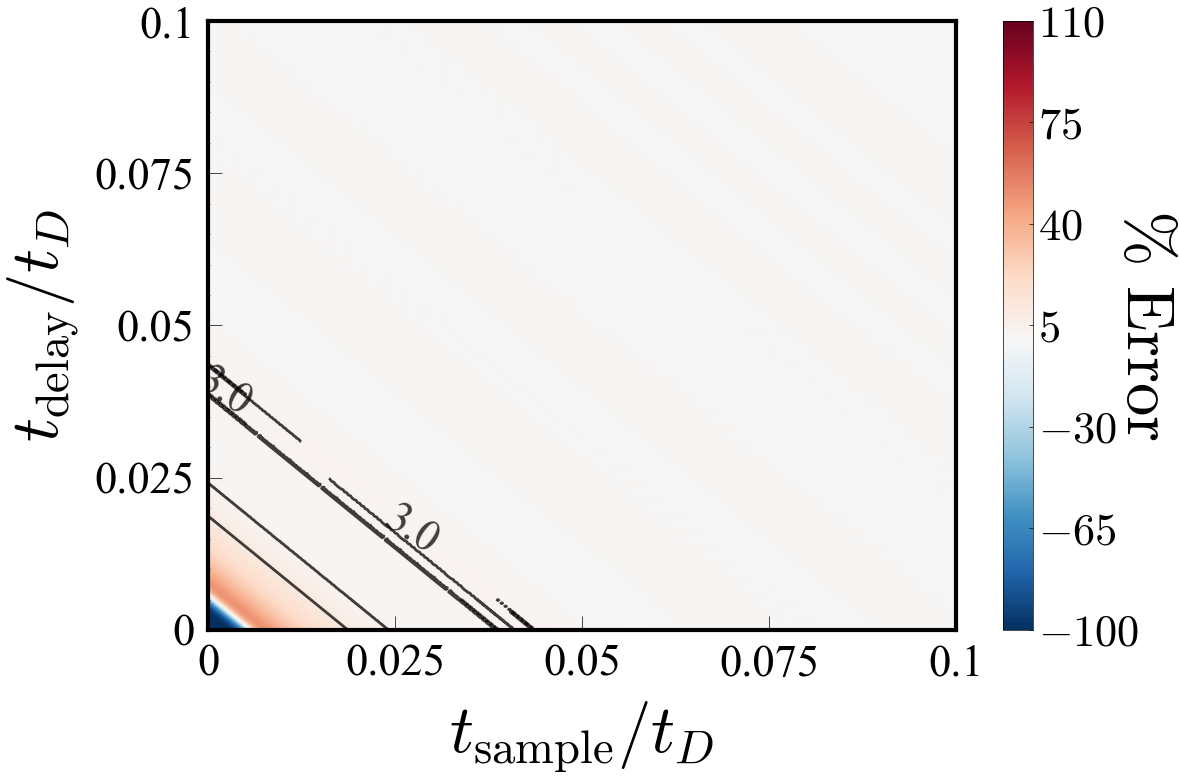

In [51]:
ees_samples = np.floor(D_EES_avg_data.shape[0]/2).astype(int)
vals = np.empty((ees_samples, ees_samples))
for i in range(ees_samples):
    vals[i] = D_EES_avg_data[i:ees_samples+i]

vals = 100 * (vals - D_ref) / D_ref

vals = vals[D_EES_t_delay[:-1], :]
vals = vals[:, D_EES_t_delay[:-1]]

# Create a meshgrid for the contour plot
X, Y = np.meshgrid(D_EES_t_delay_times[:-1], D_EES_t_delay_times[:-1])

slope = -1
intercept = 0.015

mask = Y > slope*X + intercept
masked_vals = np.ma.masked_where(Y <= slope * X + intercept, vals)

# Symmetric limits
max_val = max(abs(vals.min()), abs(vals.max()))
min_val = -max_val


max_val = 110
min_val = -100

# Plot the contour plot
plt.figure(figsize=(12, 8))
color_norm = TwoSlopeNorm(vmin=min_val, vcenter=0, vmax=max_val)  # Center at 0

# Filled contours
contour_filled = plt.contourf(X, Y, vals, levels=np.linspace(min_val, max_val, 1000), norm=color_norm, cmap='RdBu_r')

# custom_levels = [3] + [con for con in np.linspace(3.5, 20, 200)] + [21, 22, 23, 24, 25, 30]

custom_levels = [3, 10 ,30]

contour_lines = plt.contour(X, Y, masked_vals, levels=custom_levels, colors='black', linewidths=2, linestyles='solid', alpha=0.75)


# # Add labels to the contour lines and make the numbers bold
# label_positions = [(1.0, 0.2), (2.5, 0.1), (3.0, 0.4)]  # Example positions for labels
# Coordinates clicked: [(0.9784946236559138, 0.1452922077922078), (1.3548387096774193, 0.18831168831168835), (1.9193548387096773, 0.28814935064935066), (2.467741935483871, 0.4066558441558442)]
label_positions = [(0.355, 0.0917) , (.575, 0.1494), (0.742, 0.2062)] #, (2.467741935483871, 0.4066558441558442)]



c_lines = plt.clabel(contour_lines, inline=True, fontsize=32, fmt="%.1f", colors='black') #,  manual=label_positions)

# for text in c_lines:
#     text.set_fontproperties(times_new_roman)

times_new_roman = fm.FontProperties(family="Times New Roman", size=32)

for text in c_lines:
    text.set_fontproperties(times_new_roman)




# Add color bar
cbar = plt.colorbar(contour_filled)
cbar.set_label(r"$\mathrm{\% \ Error}$", rotation=270, labelpad=25, fontsize=48)
# Place colorbar label at top of colorbar given specific coords 
cbar.set_ticks(np.linspace(-100, 110, 7))  # Use dynamic ticks
cbar.ax.tick_params(labelsize=32)

# for label in cbar.ax.get_yticklabels():
#     label.set_fontproperties(times_new_roman)



# Axis labels and title
plt.xlabel(r"$t_{\mathrm{sample}}/t_D$", fontsize=48, labelpad=10)
plt.ylabel(r"$t_{\mathrm{delay}}/t_D$", fontsize=48, labelpad=10)
title = r'% Error in Estimation of Self-Diffusivity as a Function of Start and Sample Time via EES w/o cumulative averaging'
wrapped_title = '\n'.join(wrap(title, width=50))

# plt.title(wrapped_title, fontsize=30, fontweight='bold')

# Adjust ticks
plt.yticks(np.arange(0, 0.125, 0.025), fontsize=32)
plt.xticks(np.arange(0, 0.12, .025), fontsize=32)
# Add 10 padding to both ticks 
plt.tick_params(axis='x', direction='in', pad=10, length=10)
plt.tick_params(axis='y', direction='in', pad=10, length=10)

# Make the tick fonts the same font as the labels
plt.xticks(fontname='Times New Roman')
plt.yticks(fontname='Times New Roman')

plt.xlim(0, .1)
plt.ylim(0, .1)

ax = plt.gca()

ax.xaxis.set_major_formatter(ticker.FuncFormatter(remove_trailing_zeros))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(remove_trailing_zeros))


# plt.draw()  # Ensures the figure is drawn
# print("Click on the plot to record coordinates (Press Enter to finish)...")
# coords = plt.ginput(n=-1, timeout=0)  # Waits indefinitely for input until Enter is pressed
# plt.show(block=True)  # Keeps the plot open for interaction
# plt.close()  # Close the plot window after capturing coordinates
# print("Coordinates clicked:", coords)

# Remove top and right spines


# Remove top and right ticks
ax.yaxis.set_ticks_position('left')

ax.xaxis.set_ticks_position('bottom')

for spine in ax.spines.values():
    spine.set_linewidth(3)






plt.tight_layout()
# plt.savefig('/Users/nickhattrup/Documents/research/projects/PAEstimate/data_4_paper/figures/error_plot_ees.svg', dpi=450, format='svg')


In [ ]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt



trails = 128
num_steps_lst =[8, 16, 32, 64, 128, 256, 512, 1024, 2048]
N_eff_list_all = []
for num_steps in num_steps_lst:
    N_eff_list = []
    for t in range(trails):
        step_size = 1
        num_trjs = 1000 
        chunk = 100
        loops = num_trjs // chunk

        num_particles = 256
        num_dims = 3
        times = np.arange(0, num_steps) # msd = 0 at time 0

        Zs_all = [] 
        Ds_all = []

        for loop in tqdm(range(loops)):
            trjs = np.cumsum(2*np.random.randint(0, high=2, size=(chunk, num_particles, num_steps, num_dims), dtype=int)-1, axis=2)* step_size
            trjs -= trjs[:, :, 0:1, :]
            sq_displacements = np.sum(trjs**2, axis=3) # Assuming all start at 0 
            msd = np.mean(sq_displacements, axis=1)  # Average over particles

            assert np.allclose(msd[:, 0], 0.0) # ensure starting at 0 

            Ds = msd @ times / (times @ times) / 6 # Get time-series averaged D estimates for each tajectory 
            D_avg = np.mean(Ds) 
            Ds_all.append(D_avg)
            Zs_all.append(msd[:, -1] / times[-1])
        
        Zs_all = np.concatenate(Zs_all) 
        D_avg = np.mean(Ds_all)
        Zs_all -= 6 * D_avg # Center Zs around 0
        Zs_all_var = np.var(Zs_all) # Use unbiased variance even though we know true mean 0 
        N_eff = 24 * D_avg**2 / Zs_all_var
        # print("Estimated D:", D_avg, " True D:", step_size**2/2, "std D:", np.std(Ds_all))
        # print("Mean of Zs:", np.mean(Zs_all), " Var of Zs:", Zs_all_var, "True mean of Zs:", 0, "True Var of Zs:", 24 * D_avg**2/ num_particles)
        # print("Estimated N_eff:", N_eff, " out of ", num_particles)
        N_eff_list.append(N_eff)
    N_eff_list_all.append(N_eff_list)

N_eff_list_all = np.array(N_eff_list_all)
N_eff_list_all_avg = np.mean(N_eff_list_all, axis=1)
N_eff_list_all_std = np.std(N_eff_list_all, axis=1)
N_eff_list_all_serr = N_eff_list_all_std / np.sqrt(trails)

plt.scatter(num_steps_lst, N_eff_list_all_avg, marker='o')
# error bars
plt.errorbar(num_steps_lst, N_eff_list_all_avg, yerr=N_eff_list_all_serr, fmt='o', capsize=5)
plt.plot(num_steps_lst, np.ones_like(num_steps_lst)*256, linestyle='--', color='gray')
plt.xlabel('Number of Steps per Trajectory')
plt.ylabel('Estimated N_eff')
plt.title('N_trj = 1000, N_trials = 128')

100%|██████████| 10/10 [00:00<00:00, 66.68it/s]


Estimated D: 0.5000548611111112  True D: 0.5 std D: 0.0016007575608187993
Mean of Zs: -0.0005986979166669357  Var of Zs: 0.018465396713256838 True mean of Zs: 0 True Var of Zs: 0.023442643511329943
Estimated N_eff: 325.0034013399749  out of  256


100%|██████████| 10/10 [00:00<00:00, 135.45it/s]


Estimated D: 0.5001913194444445  True D: 0.5 std D: 0.002370231542407186
Mean of Zs: 0.000367708333332974  Var of Zs: 0.01766222314453125 True mean of Zs: 0 True Var of Zs: 0.02345543962946009
Estimated N_eff: 339.9681057138599  out of  256


100%|██████████| 10/10 [00:00<00:00, 141.44it/s]


Estimated D: 0.500096701388889  True D: 0.5 std D: 0.001239546142552117
Mean of Zs: -0.0019434895833339424  Var of Zs: 0.01796098631286621 True mean of Zs: 0 True Var of Zs: 0.02344656663187946
Estimated N_eff: 334.1866060808379  out of  256


100%|██████████| 10/10 [00:00<00:00, 128.97it/s]


Estimated D: 0.4993215277777778  True D: 0.5 std D: 0.0011294527791133582
Mean of Zs: 2.0052083333467863e-05  Var of Zs: 0.01671328172302246 True mean of Zs: 0 True Var of Zs: 0.023373936384593823
Estimated N_eff: 358.0223090605518  out of  256


100%|██████████| 10/10 [00:00<00:00, 131.59it/s]


Estimated D: 0.5004244791666668  True D: 0.5 std D: 0.0014375612762872472
Mean of Zs: 0.0011093749999993854  Var of Zs: 0.0175952744140625 True mean of Zs: 0 True Var of Zs: 0.023477311813990286
Estimated N_eff: 341.57988576626263  out of  256


100%|██████████| 10/10 [00:00<00:00, 122.07it/s]


Estimated D: 0.49893368055555554  True D: 0.5 std D: 0.001712145841769232
Mean of Zs: -0.001801302083333219  Var of Zs: 0.01790318601989746 True mean of Zs: 0 True Var of Zs: 0.023337639149316858
Estimated N_eff: 333.70795653830413  out of  256


100%|██████████| 10/10 [00:00<00:00, 120.18it/s]


Estimated D: 0.5001876736111112  True D: 0.5 std D: 0.00214837355404277
Mean of Zs: 0.002147395833333256  Var of Zs: 0.017564479919433596 True mean of Zs: 0 True Var of Zs: 0.02345509770304645
Estimated N_eff: 341.85498457807563  out of  256


100%|██████████| 10/10 [00:00<00:00, 121.71it/s]


Estimated D: 0.49985954861111115  True D: 0.5 std D: 0.002221601536853845
Mean of Zs: -0.0005518229166671134  Var of Zs: 0.01757732469177246 True mean of Zs: 0 True Var of Zs: 0.023424334531659728
Estimated N_eff: 341.15712972587767  out of  256


100%|██████████| 10/10 [00:00<00:00, 118.23it/s]


Estimated D: 0.500495486111111  True D: 0.5 std D: 0.0010197545438330664
Mean of Zs: -0.0011252604166663255  Var of Zs: 0.0177347606048584 True mean of Zs: 0 True Var of Zs: 0.023483974839149754
Estimated N_eff: 338.9894959831254  out of  256


100%|██████████| 10/10 [00:00<00:00, 127.57it/s]


Estimated D: 0.5007789930555555  True D: 0.5 std D: 0.002203891279760252
Mean of Zs: -0.0023848958333330616  Var of Zs: 0.017852548278808594 True mean of Zs: 0 True Var of Zs: 0.023510587489287763
Estimated N_eff: 337.13452574174084  out of  256


100%|██████████| 10/10 [00:00<00:00, 127.01it/s]


Estimated D: 0.5000791666666666  True D: 0.5 std D: 0.0015369606837279787
Mean of Zs: -0.00011953124999978115  Var of Zs: 0.018835887435913086 True mean of Zs: 0 True Var of Zs: 0.023444922462565104
Estimated N_eff: 318.6417507981736  out of  256


100%|██████████| 10/10 [00:00<00:00, 129.56it/s]


Estimated D: 0.49969149305555555  True D: 0.5 std D: 0.0008953992171931278
Mean of Zs: 0.0014721354166668307  Var of Zs: 0.018724297958374023 True mean of Zs: 0 True Var of Zs: 0.02340858639675847
Estimated N_eff: 320.0439413478844  out of  256


100%|██████████| 10/10 [00:00<00:00, 140.34it/s]


Estimated D: 0.4992418402777779  True D: 0.5 std D: 0.0024612431590504556
Mean of Zs: -0.0021736979166675353  Var of Zs: 0.017427874130249023 True mean of Zs: 0 True Var of Zs: 0.02336647641411959
Estimated N_eff: 343.23279576779584  out of  256


100%|██████████| 10/10 [00:00<00:00, 136.41it/s]


Estimated D: 0.5009987847222223  True D: 0.5 std D: 0.0017460008334330846
Mean of Zs: -0.0005083333333333187  Var of Zs: 0.018186535400390624 True mean of Zs: 0 True Var of Zs: 0.023531229589982217
Estimated N_eff: 331.2337750106081  out of  256


100%|██████████| 10/10 [00:00<00:00, 129.19it/s]


Estimated D: 0.49978871527777785  True D: 0.5 std D: 0.0010981632331935232
Mean of Zs: 0.002045052083332784  Var of Zs: 0.017021261581420897 True mean of Zs: 0 True Var of Zs: 0.023417696242407346
Estimated N_eff: 352.20246216061247  out of  256


100%|██████████| 10/10 [00:00<00:00, 128.47it/s]


Estimated D: 0.5011187500000001  True D: 0.5 std D: 0.002000951801392767
Mean of Zs: 0.0003148437499996568  Var of Zs: 0.017417733749389652 True mean of Zs: 0 True Var of Zs: 0.02354250015014649
Estimated N_eff: 346.01975923812097  out of  256


100%|██████████| 10/10 [00:00<00:00, 140.25it/s]


Estimated D: 0.5003453124999999  True D: 0.5 std D: 0.0019460384478918377
Mean of Zs: 0.0010726562500004988  Var of Zs: 0.017072280502319338 True mean of Zs: 0 True Var of Zs: 0.02346988422569274
Estimated N_eff: 351.9325002281383  out of  256


100%|██████████| 10/10 [00:00<00:00, 137.91it/s]


Estimated D: 0.4993413194444444  True D: 0.5 std D: 0.0020595418425643163
Mean of Zs: -0.002176822916666033  Var of Zs: 0.018248493026733398 True mean of Zs: 0 True Var of Zs: 0.023375789372298623
Estimated N_eff: 327.9285621306813  out of  256


100%|██████████| 10/10 [00:00<00:00, 80.84it/s]


Estimated D: 0.5004946180555556  True D: 0.5 std D: 0.001645383210613999
Mean of Zs: -0.0016083333333337074  Var of Zs: 0.017997083984375002 True mean of Zs: 0 True Var of Zs: 0.023483893378366545
Estimated N_eff: 334.04726621720073  out of  256


100%|██████████| 10/10 [00:00<00:00, 132.09it/s]


Estimated D: 0.4989251736111111  True D: 0.5 std D: 0.0017104614697999437
Mean of Zs: -0.0010901041666666344  Var of Zs: 0.01762489471435547 True mean of Zs: 0 True Var of Zs: 0.023336843330894752
Estimated N_eff: 338.9655365057612  out of  256


100%|██████████| 10/10 [00:00<00:00, 124.28it/s]


Estimated D: 0.5004451388888889  True D: 0.5 std D: 0.0014401177603839065
Mean of Zs: 0.000973697916666822  Var of Zs: 0.01740454881286621 True mean of Zs: 0 True Var of Zs: 0.02347925034726743
Estimated N_eff: 345.3515603034246  out of  256


100%|██████████| 10/10 [00:00<00:00, 128.52it/s]


Estimated D: 0.4990144097222222  True D: 0.5 std D: 0.00229295221860041
Mean of Zs: 0.0008901041666666884  Var of Zs: 0.016655673278808594 True mean of Zs: 0 True Var of Zs: 0.023345191979101676
Estimated N_eff: 358.8188268710761  out of  256


100%|██████████| 10/10 [00:00<00:00, 125.72it/s]


Estimated D: 0.5000855902777778  True D: 0.5 std D: 0.0016531005407447346
Mean of Zs: -0.0009315104166668391  Var of Zs: 0.017800804916381835 True mean of Zs: 0 True Var of Zs: 0.023445524775325632
Estimated N_eff: 337.17881695112305  out of  256


100%|██████████| 10/10 [00:00<00:00, 120.73it/s]


Estimated D: 0.4993223958333333  True D: 0.5 std D: 0.0011296455038469076
Mean of Zs: 2.656249999996163e-05  Var of Zs: 0.01786732244873047 True mean of Zs: 0 True Var of Zs: 0.023374017654444374
Estimated N_eff: 334.89900552854937  out of  256


100%|██████████| 10/10 [00:00<00:00, 128.44it/s]


Estimated D: 0.5005543402777778  True D: 0.5 std D: 0.002645732633555026
Mean of Zs: -0.00019713541666694569  Var of Zs: 0.018816183456420898 True mean of Zs: 0 True Var of Zs: 0.023489498209773876
Estimated N_eff: 319.5818937261748  out of  256


100%|██████████| 10/10 [00:00<00:00, 137.16it/s]


Estimated D: 0.5005300347222222  True D: 0.5 std D: 0.0023205101731278636
Mean of Zs: 0.00037838541666678795  Var of Zs: 0.0177092449798584 True mean of Zs: 0 True Var of Zs: 0.023487217093033967
Estimated N_eff: 339.52478395636115  out of  256


100%|██████████| 10/10 [00:00<00:00, 138.56it/s]


Estimated D: 0.5001973958333334  True D: 0.5 std D: 0.002006732232689078
Mean of Zs: -0.00011406250000068141  Var of Zs: 0.017890364440917968 True mean of Zs: 0 True Var of Zs: 0.023456009512354544
Estimated N_eff: 335.6409230786277  out of  256


100%|██████████| 10/10 [00:00<00:00, 134.56it/s]


Estimated D: 0.4997104166666667  True D: 0.5 std D: 0.002146555018429558
Mean of Zs: 0.0011867187499999474  Var of Zs: 0.01823188963317871 True mean of Zs: 0 True Var of Zs: 0.02341035942423503
Estimated N_eff: 328.71260923486  out of  256


100%|██████████| 10/10 [00:00<00:00, 127.65it/s]


Estimated D: 0.5005588541666665  True D: 0.5 std D: 0.0010940154687754842
Mean of Zs: -0.0009078124999985135  Var of Zs: 0.01679242132568359 True mean of Zs: 0 True Var of Zs: 0.023489921857935567
Estimated N_eff: 358.10321090706134  out of  256


100%|██████████| 10/10 [00:00<00:00, 133.01it/s]


Estimated D: 0.4992434027777778  True D: 0.5 std D: 0.001581426231761906
Mean of Zs: 0.0005473958333330416  Var of Zs: 0.016999382263183593 True mean of Zs: 0 True Var of Zs: 0.023366622676606354
Estimated N_eff: 351.88663403178055  out of  256


100%|██████████| 10/10 [00:00<00:00, 132.29it/s]


Estimated D: 0.4996668402777777  True D: 0.5 std D: 0.001479452822232554
Mean of Zs: -0.0016026041666660333  Var of Zs: 0.01777679315185547 True mean of Zs: 0 True Var of Zs: 0.023406276681860457
Estimated N_eff: 337.06905285843726  out of  256


100%|██████████| 10/10 [00:00<00:00, 127.91it/s]


Estimated D: 0.4997727430555556  True D: 0.5 std D: 0.0018681769583769603
Mean of Zs: 0.00021510416666663447  Var of Zs: 0.01702935125732422 True mean of Zs: 0 True Var of Zs: 0.023416199503244473
Estimated N_eff: 352.0126505260949  out of  256


100%|██████████| 10/10 [00:00<00:00, 64.00it/s]


Estimated D: 0.5004001096491227  True D: 0.5 std D: 0.00242663678808104
Mean of Zs: -0.0035569078947366474  Var of Zs: 0.022339603961709104 True mean of Zs: 0 True Var of Zs: 0.023475025287830065
Estimated N_eff: 269.0113255358144  out of  256


100%|██████████| 10/10 [00:00<00:00, 64.93it/s]


Estimated D: 0.49918430190058477  True D: 0.5 std D: 0.0022570921925412013
Mean of Zs: -0.0017863669590640683  Var of Zs: 0.02025877970679012 True mean of Zs: 0 True Var of Zs: 0.02336109068099758
Estimated N_eff: 295.20234194219114  out of  256


100%|██████████| 10/10 [00:00<00:00, 66.56it/s]


Estimated D: 0.5000671600877192  True D: 0.5 std D: 0.0013231367550757094
Mean of Zs: -0.005118238304093383  Var of Zs: 0.02036911453510802 True mean of Zs: 0 True Var of Zs: 0.02344379668108093
Estimated N_eff: 294.64275140740136  out of  256


100%|██████████| 10/10 [00:00<00:00, 64.31it/s]


Estimated D: 0.4997702850877193  True D: 0.5 std D: 0.002059433273513111
Mean of Zs: -0.00037865497076042763  Var of Zs: 0.020057532359182097 True mean of Zs: 0 True Var of Zs: 0.023415969174061895
Estimated N_eff: 298.8646859051752  out of  256


100%|██████████| 10/10 [00:00<00:00, 58.59it/s]


Estimated D: 0.49943214546783626  True D: 0.5 std D: 0.0019170066485495758
Mean of Zs: -0.001315095029239692  Var of Zs: 0.02195399787808642 True mean of Zs: 0 True Var of Zs: 0.023384293868119306
Estimated N_eff: 272.67831870448987  out of  256


100%|██████████| 10/10 [00:00<00:00, 49.97it/s]


Estimated D: 0.5007754203216375  True D: 0.5 std D: 0.0019762564602835383
Mean of Zs: 0.0019516447368418724  Var of Zs: 0.02334708232060185 True mean of Zs: 0 True Var of Zs: 0.023510252024841815
Estimated N_eff: 257.78915051190666  out of  256


100%|██████████| 10/10 [00:00<00:00, 61.63it/s]


Estimated D: 0.5008058845029241  True D: 0.5 std D: 0.0013808521973487778
Mean of Zs: -0.0031582236842113164  Var of Zs: 0.018935012912326393 True mean of Zs: 0 True Var of Zs: 0.02351311255807089
Estimated N_eff: 317.89557486637057  out of  256


100%|██████████| 10/10 [00:00<00:00, 64.91it/s]


Estimated D: 0.5005705957602339  True D: 0.5 std D: 0.0018536468412683178
Mean of Zs: 0.0010764254385964814  Var of Zs: 0.021225482060185187 True mean of Zs: 0 True Var of Zs: 0.023491023875602077
Estimated N_eff: 283.3246422909117  out of  256


100%|██████████| 10/10 [00:00<00:00, 63.79it/s]


Estimated D: 0.5004625548245615  True D: 0.5 std D: 0.0016343359294800327
Mean of Zs: 0.0009607821637424596  Var of Zs: 0.02253636458333333 True mean of Zs: 0 True Var of Zs: 0.023480884573268173
Estimated N_eff: 266.72919798263024  out of  256


100%|██████████| 10/10 [00:00<00:00, 67.05it/s]


Estimated D: 0.5007538559941521  True D: 0.5 std D: 0.0017889378839918819
Mean of Zs: 0.0025601973684203925  Var of Zs: 0.022273297646604937 True mean of Zs: 0 True Var of Zs: 0.02350822727746988
Estimated N_eff: 270.1937664784727  out of  256


100%|██████████| 10/10 [00:00<00:00, 68.49it/s]


Estimated D: 0.5002142178362573  True D: 0.5 std D: 0.0022018279191810463
Mean of Zs: 0.0009056652046781876  Var of Zs: 0.02170800587143133 True mean of Zs: 0 True Var of Zs: 0.02345758722426925
Estimated N_eff: 276.6326103364452  out of  256


100%|██████████| 10/10 [00:00<00:00, 61.30it/s]


Estimated D: 0.49985718201754387  True D: 0.5 std D: 0.0024584417332815796
Mean of Zs: -0.0008861476608186373  Var of Zs: 0.0219865692033179 True mean of Zs: 0 True Var of Zs: 0.023424112726361246
Estimated N_eff: 272.7379975700602  out of  256


100%|██████████| 10/10 [00:00<00:00, 60.97it/s]


Estimated D: 0.49981399853801173  True D: 0.5 std D: 0.002430638556051102
Mean of Zs: -0.0014742690058482597  Var of Zs: 0.0202967723283179 True mean of Zs: 0 True Var of Zs: 0.023420065606364587
Estimated N_eff: 295.3936073305807  out of  256


100%|██████████| 10/10 [00:00<00:00, 76.20it/s]


Estimated D: 0.5008532346491228  True D: 0.5 std D: 0.0018561756005453928
Mean of Zs: 0.0004708698830410292  Var of Zs: 0.021965276572145063 True mean of Zs: 0 True Var of Zs: 0.023517558999233367
Estimated N_eff: 274.0914772472541  out of  256


100%|██████████| 10/10 [00:00<00:00, 74.29it/s]


Estimated D: 0.49985383771929814  True D: 0.5 std D: 0.001312183810505578
Mean of Zs: -0.00048413742689975826  Var of Zs: 0.019925809413580246 True mean of Zs: 0 True Var of Zs: 0.023423799289004104
Estimated N_eff: 300.9409802895233  out of  256


100%|██████████| 10/10 [00:00<00:00, 68.93it/s]


Estimated D: 0.4992160087719298  True D: 0.5 std D: 0.002094209829175762
Mean of Zs: -0.0028377192982454976  Var of Zs: 0.020064409915123455 True mean of Zs: 0 True Var of Zs: 0.02336405844507895
Estimated N_eff: 298.0999185743265  out of  256


100%|██████████| 10/10 [00:00<00:00, 61.22it/s]


Estimated D: 0.49993563596491225  True D: 0.5 std D: 0.0011521552471984295
Mean of Zs: -0.0005929824561400591  Var of Zs: 0.021945149450231474 True mean of Zs: 0 True Var of Zs: 0.02343146626009137
Estimated N_eff: 273.338551472937  out of  256


100%|██████████| 10/10 [00:00<00:00, 69.01it/s]


Estimated D: 0.49996957236842104  True D: 0.5 std D: 0.0012018332860843574
Mean of Zs: 0.0005332602339180617  Var of Zs: 0.01966855708670911 True mean of Zs: 0 True Var of Zs: 0.023434647496337044
Estimated N_eff: 305.01829557778024  out of  256


100%|██████████| 10/10 [00:00<00:00, 50.88it/s]


Estimated D: 0.49999409722222216  True D: 0.5 std D: 0.0015327162526123244
Mean of Zs: 0.0009312500000002819  Var of Zs: 0.019679656587577164 True mean of Zs: 0 True Var of Zs: 0.02343694661784984
Estimated N_eff: 304.87617034725014  out of  256


100%|██████████| 10/10 [00:00<00:00, 65.95it/s]


Estimated D: 0.49865723684210533  True D: 0.5 std D: 0.0011063458242634855
Mean of Zs: 0.0016260233918125517  Var of Zs: 0.022187645833333335 True mean of Zs: 0 True Var of Zs: 0.023311784986406583
Estimated N_eff: 268.9702639634895  out of  256


100%|██████████| 10/10 [00:00<00:00, 67.71it/s]


Estimated D: 0.4994771564327484  True D: 0.5 std D: 0.0017451440084584025
Mean of Zs: -0.0013386330409348962  Var of Zs: 0.021262074158468366 True mean of Zs: 0 True Var of Zs: 0.023388509043576023
Estimated N_eff: 281.602738779403  out of  256


100%|██████████| 10/10 [00:00<00:00, 69.07it/s]


Estimated D: 0.4997150402046783  True D: 0.5 std D: 0.0017888037048674425
Mean of Zs: -0.0029812134502916377  Var of Zs: 0.020469615632233797 True mean of Zs: 0 True Var of Zs: 0.023410792631884052
Estimated N_eff: 292.7833634709192  out of  256


100%|██████████| 10/10 [00:00<00:00, 70.11it/s]


Estimated D: 0.5000295504385965  True D: 0.5 std D: 0.001646353045768598
Mean of Zs: -0.002670358187134783  Var of Zs: 0.019984211950231482 True mean of Zs: 0 True Var of Zs: 0.023440270435483593
Estimated N_eff: 300.27249743086776  out of  256


100%|██████████| 10/10 [00:00<00:00, 68.20it/s]


Estimated D: 0.5002608187134503  True D: 0.5 std D: 0.0014275987221974683
Mean of Zs: 0.00040730994152045244  Var of Zs: 0.02108269888117284 True mean of Zs: 0 True Var of Zs: 0.023461958131861086
Estimated N_eff: 284.8905311226599  out of  256


100%|██████████| 10/10 [00:00<00:00, 68.92it/s]


Estimated D: 0.5007543128654971  True D: 0.5 std D: 0.0009800970968174988
Mean of Zs: 0.002668567251462087  Var of Zs: 0.02161939158950617 True mean of Zs: 0 True Var of Zs: 0.02350827017375589
Estimated N_eff: 278.36662930896904  out of  256


100%|██████████| 10/10 [00:00<00:00, 66.52it/s]


Estimated D: 0.5004110197368422  True D: 0.5 std D: 0.002486046368401351
Mean of Zs: 0.0027109649122798447  Var of Zs: 0.02087762730275849 True mean of Zs: 0 True Var of Zs: 0.023476048938193717
Estimated N_eff: 287.86166363758815  out of  256


100%|██████████| 10/10 [00:00<00:00, 68.47it/s]


Estimated D: 0.4999486476608187  True D: 0.5 std D: 0.0015989253460412386
Mean of Zs: 6.505847953200572e-05  Var of Zs: 0.02057353274498457 True mean of Zs: 0 True Var of Zs: 0.023432685965426386
Estimated N_eff: 291.5769343800004  out of  256


100%|██████████| 10/10 [00:00<00:00, 70.14it/s]


Estimated D: 0.500097880116959  True D: 0.5 std D: 0.0028478696370084337
Mean of Zs: 0.0017252192982462708  Var of Zs: 0.02073011241319445 True mean of Zs: 0 True Var of Zs: 0.0234466771591384
Estimated N_eff: 289.5473614952041  out of  256


100%|██████████| 10/10 [00:00<00:00, 71.16it/s]


Estimated D: 0.4997049890350877  True D: 0.5 std D: 0.0021053324616782314
Mean of Zs: 0.003037426900585036  Var of Zs: 0.02073552969473379 True mean of Zs: 0 True Var of Zs: 0.02340985088123973
Estimated N_eff: 289.0170597917928  out of  256


100%|██████████| 10/10 [00:00<00:00, 68.69it/s]


Estimated D: 0.500672240497076  True D: 0.5 std D: 0.002290003125869267
Mean of Zs: 0.000997807017543773  Var of Zs: 0.02130337817081404 True mean of Zs: 0 True Var of Zs: 0.023500564912908934
Estimated N_eff: 282.4033150736111  out of  256


100%|██████████| 10/10 [00:00<00:00, 69.69it/s]


Estimated D: 0.49910705409356726  True D: 0.5 std D: 0.0017072941496921517
Mean of Zs: -0.0013055190058477758  Var of Zs: 0.020667202437789352 True mean of Zs: 0 True Var of Zs: 0.023353861073058663
Estimated N_eff: 289.2790377749119  out of  256


100%|██████████| 10/10 [00:00<00:00, 66.81it/s]


Estimated D: 0.4993991593567252  True D: 0.5 std D: 0.0023044685579568062
Mean of Zs: 0.0016224049707597677  Var of Zs: 0.02089799092158565 True mean of Zs: 0 True Var of Zs: 0.023381205034331606
Estimated N_eff: 286.41932668304224  out of  256


100%|██████████| 10/10 [00:00<00:00, 37.29it/s]


Estimated D: 0.5004509931680161  True D: 0.5 std D: 0.0016588188434671115
Mean of Zs: 0.0002183830971664893  Var of Zs: 0.021926253884608726 True mean of Zs: 0 True Var of Zs: 0.023479799677767532
Estimated N_eff: 274.13842552137135  out of  256


100%|██████████| 10/10 [00:00<00:00, 38.66it/s]


Estimated D: 0.5006624683704454  True D: 0.5 std D: 0.0016735276449214673
Mean of Zs: 0.0005399924089065138  Var of Zs: 0.023623999023437498 True mean of Zs: 0 True Var of Zs: 0.023499647553261303
Estimated N_eff: 254.65247300706696  out of  256


100%|██████████| 10/10 [00:00<00:00, 31.62it/s]


Estimated D: 0.49935465797908235  True D: 0.5 std D: 0.0018419469019633344
Mean of Zs: 0.003528302125506008  Var of Zs: 0.022128504044213123 True mean of Zs: 0 True Var of Zs: 0.023377038229256842
Estimated N_eff: 270.4440288748203  out of  256


100%|██████████| 10/10 [00:00<00:00, 36.40it/s]


Estimated D: 0.4998440009278003  True D: 0.5 std D: 0.0018591688857565376
Mean of Zs: 0.0013734944331981432  Var of Zs: 0.02104482785448407 True mean of Zs: 0 True Var of Zs: 0.02342287736845414
Estimated N_eff: 284.9278049592895  out of  256


100%|██████████| 10/10 [00:00<00:00, 34.01it/s]


Estimated D: 0.49975207700742247  True D: 0.5 std D: 0.002225528581448035
Mean of Zs: 0.0009957616396756013  Var of Zs: 0.022063180615369635 True mean of Zs: 0 True Var of Zs: 0.023414262981865566
Estimated N_eff: 271.676664749869  out of  256


100%|██████████| 10/10 [00:00<00:00, 36.67it/s]


Estimated D: 0.5008065494264506  True D: 0.5 std D: 0.0022670616535944896
Mean of Zs: 0.0002676113360329886  Var of Zs: 0.023473943838188193 True mean of Zs: 0 True Var of Zs: 0.023513174995165118
Estimated N_eff: 256.42784358075164  out of  256


100%|██████████| 10/10 [00:00<00:00, 37.45it/s]


Estimated D: 0.500448812837382  True D: 0.5 std D: 0.002125073783777086
Mean of Zs: 0.0013268598178132645  Var of Zs: 0.021365983336218836 True mean of Zs: 0 True Var of Zs: 0.023479595087844838
Estimated N_eff: 281.3245825339117  out of  256


100%|██████████| 10/10 [00:00<00:00, 36.65it/s]


Estimated D: 0.5009851130229419  True D: 0.5 std D: 0.0009885073260971254
Mean of Zs: 0.0034084008097169712  Var of Zs: 0.02227617632228186 True mean of Zs: 0 True Var of Zs: 0.023529945325369672
Estimated N_eff: 270.40843617624955  out of  256


100%|██████████| 10/10 [00:00<00:00, 36.32it/s]


Estimated D: 0.49949015688259113  True D: 0.5 std D: 0.0023350783401870872
Mean of Zs: -0.003151467611336252  Var of Zs: 0.022151401878462602 True mean of Zs: 0 True Var of Zs: 0.02338972657711833
Estimated N_eff: 270.31110882260185  out of  256


100%|██████████| 10/10 [00:00<00:00, 35.54it/s]


Estimated D: 0.49996226594129556  True D: 0.5 std D: 0.0019117185123954908
Mean of Zs: 0.0014451543522268743  Var of Zs: 0.021154220911422265 True mean of Zs: 0 True Var of Zs: 0.02343396256548326
Estimated N_eff: 283.58853024572943  out of  256


100%|██████████| 10/10 [00:00<00:00, 30.73it/s]


Estimated D: 0.49943643302968954  True D: 0.5 std D: 0.0024821530524466143
Mean of Zs: -0.0012057692307686106  Var of Zs: 0.023099973162114783 True mean of Zs: 0 True Var of Zs: 0.023384695372258086
Estimated N_eff: 259.15536668744824  out of  256


100%|██████████| 10/10 [00:00<00:00, 35.67it/s]


Estimated D: 0.4990446841261808  True D: 0.5 std D: 0.0018305851104998927
Mean of Zs: -0.0002993547570847119  Var of Zs: 0.023048428061699277 True mean of Zs: 0 True Var of Zs: 0.02334802469574371
Estimated N_eff: 259.3276342364895  out of  256


100%|██████████| 10/10 [00:00<00:00, 35.00it/s]


Estimated D: 0.5001969382591093  True D: 0.5 std D: 0.0018632411005516623
Mean of Zs: -0.005443142712550126  Var of Zs: 0.021794666829877945 True mean of Zs: 0 True Var of Zs: 0.02345596659785505
Estimated N_eff: 275.51361513905374  out of  256


100%|██████████| 10/10 [00:00<00:00, 36.46it/s]


Estimated D: 0.5009505123987854  True D: 0.5 std D: 0.0014912001267301958
Mean of Zs: 0.004120938765182296  Var of Zs: 0.02429193611225329 True mean of Zs: 0 True Var of Zs: 0.023526695238056783
Estimated N_eff: 247.9355269629789  out of  256


100%|██████████| 10/10 [00:00<00:00, 35.81it/s]


Estimated D: 0.49984954875168697  True D: 0.5 std D: 0.001937149884415834
Mean of Zs: 0.0007481022267203033  Var of Zs: 0.023101208567780473 True mean of Zs: 0 True Var of Zs: 0.0234233973175561
Estimated N_eff: 259.57038982183803  out of  256


100%|██████████| 10/10 [00:00<00:00, 36.10it/s]


Estimated D: 0.500506256325911  True D: 0.5 std D: 0.0018184404302091619
Mean of Zs: -0.00033688006072906605  Var of Zs: 0.02190050920836219 True mean of Zs: 0 True Var of Zs: 0.02348498555825423
Estimated N_eff: 274.52130202604985  out of  256


100%|██████████| 10/10 [00:00<00:00, 35.93it/s]


Estimated D: 0.500363604925776  True D: 0.5 std D: 0.0018346021267470994
Mean of Zs: 0.000859488866396458  Var of Zs: 0.021582475434448575 True mean of Zs: 0 True Var of Zs: 0.02347160035634232
Estimated N_eff: 278.4078086628043  out of  256


100%|██████████| 10/10 [00:00<00:00, 35.93it/s]


Estimated D: 0.5005358615890689  True D: 0.5 std D: 0.0013940089977052463
Mean of Zs: 0.004187790991902193  Var of Zs: 0.02082201133732254 True mean of Zs: 0 True Var of Zs: 0.023487763944066712
Estimated N_eff: 288.77457956731  out of  256


100%|██████████| 10/10 [00:00<00:00, 36.17it/s]


Estimated D: 0.4991007000674764  True D: 0.5 std D: 0.0011712978356570732
Mean of Zs: -0.0009018977732797957  Var of Zs: 0.022764980520148026 True mean of Zs: 0 True Var of Zs: 0.023353266450735474
Estimated N_eff: 262.6154767010276  out of  256


100%|██████████| 10/10 [00:00<00:00, 36.83it/s]


Estimated D: 0.49899967737854245  True D: 0.5 std D: 0.0019004335295933349
Mean of Zs: 0.0020315409919034197  Var of Zs: 0.023224740856561638 True mean of Zs: 0 True Var of Zs: 0.023343813564739635
Estimated N_eff: 257.3125060676384  out of  256


100%|██████████| 10/10 [00:00<00:00, 36.52it/s]


Estimated D: 0.4995745930330634  True D: 0.5 std D: 0.0020151556632835707
Mean of Zs: 0.001080402327935631  Var of Zs: 0.020944479243312848 True mean of Zs: 0 True Var of Zs: 0.023397635062889145
Estimated N_eff: 285.9844117638801  out of  256


100%|██████████| 10/10 [00:00<00:00, 36.80it/s]


Estimated D: 0.5000202429149797  True D: 0.5 std D: 0.0027468323620373943
Mean of Zs: -4.086538461486366e-05  Var of Zs: 0.02183369924850675 True mean of Zs: 0 True Var of Zs: 0.02343939781169581
Estimated N_eff: 274.8268065570479  out of  256


100%|██████████| 10/10 [00:00<00:00, 36.62it/s]


Estimated D: 0.5011016384109311  True D: 0.5 std D: 0.0016625058601223673
Mean of Zs: 0.004151682692307685  Var of Zs: 0.02104255256394997 True mean of Zs: 0 True Var of Zs: 0.023540892376698715
Estimated N_eff: 286.3943635221991  out of  256


100%|██████████| 10/10 [00:00<00:00, 36.71it/s]


Estimated D: 0.49916242408906875  True D: 0.5 std D: 0.0019260095302803073
Mean of Zs: -0.0027261892712543566  Var of Zs: 0.023344611947606474 True mean of Zs: 0 True Var of Zs: 0.02335904302710706
Estimated N_eff: 256.1582530632953  out of  256


100%|██████████| 10/10 [00:00<00:00, 36.93it/s]


Estimated D: 0.4997460062415654  True D: 0.5 std D: 0.0019101638014899802
Mean of Zs: -0.0004891953441290142  Var of Zs: 0.021754149238227143 True mean of Zs: 0 True Var of Zs: 0.023413694133224507
Estimated N_eff: 275.52930856853624  out of  256


100%|██████████| 10/10 [00:00<00:00, 36.15it/s]


Estimated D: 0.499967642965587  True D: 0.5 std D: 0.0018212305829188114
Mean of Zs: 0.0014655237854255426  Var of Zs: 0.0209705339740954 True mean of Zs: 0 True Var of Zs: 0.023434466626177937
Estimated N_eff: 286.0787171043096  out of  256


100%|██████████| 10/10 [00:00<00:00, 38.55it/s]


Estimated D: 0.49983134910593796  True D: 0.5 std D: 0.0021548805527366517
Mean of Zs: -0.0035604630566806214  Var of Zs: 0.021640791637811633 True mean of Zs: 0 True Var of Zs: 0.023421691645224566
Estimated N_eff: 277.067177648951  out of  256


100%|██████████| 10/10 [00:00<00:00, 37.95it/s]


Estimated D: 0.500421044197031  True D: 0.5 std D: 0.0018565709905651868
Mean of Zs: -0.0022302125506070587  Var of Zs: 0.021564625173130195 True mean of Zs: 0 True Var of Zs: 0.023476989513304396
Estimated N_eff: 278.7022388357856  out of  256


100%|██████████| 10/10 [00:00<00:00, 37.93it/s]


Estimated D: 0.5002052547233469  True D: 0.5 std D: 0.0015451616120485529
Mean of Zs: 0.0008128795546556215  Var of Zs: 0.024616705849095397 True mean of Zs: 0 True Var of Zs: 0.02345674657995453
Estimated N_eff: 243.93707108008627  out of  256


100%|██████████| 10/10 [00:00<00:00, 36.42it/s]


Estimated D: 0.49986722756410257  True D: 0.5 std D: 0.0024791699719545384
Mean of Zs: -0.002834944331983934  Var of Zs: 0.021950448883310252 True mean of Zs: 0 True Var of Zs: 0.02342505423680834
Estimated N_eff: 273.19777907514856  out of  256


100%|██████████| 10/10 [00:00<00:00, 37.53it/s]


Estimated D: 0.4998359775641026  True D: 0.5 std D: 0.0015632290183435337
Mean of Zs: 0.0022917004048581754  Var of Zs: 0.02396691853953861 True mean of Zs: 0 True Var of Zs: 0.023422125418824567
Estimated N_eff: 250.18085229969327  out of  256


100%|██████████| 10/10 [00:00<00:00, 37.77it/s]


Estimated D: 0.500359377108637  True D: 0.5 std D: 0.000873893765325571
Mean of Zs: 0.0021216978744938927  Var of Zs: 0.021458707905016448 True mean of Zs: 0 True Var of Zs: 0.023471203711925924
Estimated N_eff: 280.00885127144056  out of  256


100%|██████████| 10/10 [00:00<00:00, 13.11it/s]


Estimated D: 0.5003901720006184  True D: 0.5 std D: 0.0025998649761133827
Mean of Zs: -0.0017906493506490487  Var of Zs: 0.023356568646120755 True mean of Zs: 0 True Var of Zs: 0.0234740928970133
Estimated N_eff: 257.2881262091334  out of  256


100%|██████████| 10/10 [00:00<00:00, 12.27it/s]


Estimated D: 0.5005877065295815  True D: 0.5 std D: 0.001621616973693597
Mean of Zs: -0.0006435861162647964  Var of Zs: 0.02262855873854644 True mean of Zs: 0 True Var of Zs: 0.02349262986830123
Estimated N_eff: 265.7753556367875  out of  256


100%|██████████| 10/10 [00:00<00:00, 13.98it/s]


Estimated D: 0.49937981794990727  True D: 0.5 std D: 0.002292806168312436
Mean of Zs: -0.004386688311688722  Var of Zs: 0.023588705971714263 True mean of Zs: 0 True Var of Zs: 0.023379393991470238
Estimated N_eff: 253.72841007019528  out of  256


100%|██████████| 10/10 [00:00<00:00, 13.71it/s]


Estimated D: 0.5001896534219749  True D: 0.5 std D: 0.0020330506050916597
Mean of Zs: -0.002959986858379526  Var of Zs: 0.024025852896172813 True mean of Zs: 0 True Var of Zs: 0.02345528338034956
Estimated N_eff: 249.9204740542626  out of  256


100%|██████████| 10/10 [00:00<00:00, 12.86it/s]


Estimated D: 0.5004227556173985  True D: 0.5 std D: 0.0015017080562536595
Mean of Zs: -0.0017355132962277343  Var of Zs: 0.02470092558439192 True mean of Zs: 0 True Var of Zs: 0.02347715009434786
Estimated N_eff: 243.3168102798043  out of  256


100%|██████████| 10/10 [00:00<00:00, 12.25it/s]


Estimated D: 0.5002300928932178  True D: 0.5 std D: 0.0025403850879468144
Mean of Zs: -0.00047239409400118813  Var of Zs: 0.024221848572209496 True mean of Zs: 0 True Var of Zs: 0.023459076172121004
Estimated N_eff: 247.93828110020087  out of  256


100%|██████████| 10/10 [00:00<00:00, 13.07it/s]


Estimated D: 0.49932965870439083  True D: 0.5 std D: 0.0025754302536149564
Mean of Zs: -0.002703079777365185  Var of Zs: 0.022236141831772572 True mean of Zs: 0 True Var of Zs: 0.023374697630797824
Estimated N_eff: 269.107952213814  out of  256


100%|██████████| 10/10 [00:00<00:00, 13.07it/s]


Estimated D: 0.49971628246753247  True D: 0.5 std D: 0.00278194167729054
Mean of Zs: -0.0005846846011130676  Var of Zs: 0.02332153456730269 True mean of Zs: 0 True Var of Zs: 0.023410909027797255
Estimated N_eff: 256.9810615944067  out of  256


100%|██████████| 10/10 [00:00<00:00, 12.89it/s]


Estimated D: 0.4996600811688312  True D: 0.5 std D: 0.00222036463845154
Mean of Zs: -0.002054874768089278  Var of Zs: 0.023497796979123284 True mean of Zs: 0 True Var of Zs: 0.02340564344190403
Estimated N_eff: 254.99602053975153  out of  256


100%|██████████| 10/10 [00:00<00:00, 12.86it/s]


Estimated D: 0.5011077563904349  True D: 0.5 std D: 0.0018416376718475747
Mean of Zs: 0.00324504329004353  Var of Zs: 0.024297648562773323 True mean of Zs: 0 True Var of Zs: 0.023541467204498952
Estimated N_eff: 248.03287399527096  out of  256


100%|██████████| 10/10 [00:00<00:00, 12.64it/s]


Estimated D: 0.4994038548752835  True D: 0.5 std D: 0.0016027460514685238
Mean of Zs: 0.001731207482992921  Var of Zs: 0.02255251505069502 True mean of Zs: 0 True Var of Zs: 0.023381644712277487
Estimated N_eff: 265.4116861417889  out of  256


100%|██████████| 10/10 [00:00<00:00, 13.30it/s]


Estimated D: 0.4992150260255618  True D: 0.5 std D: 0.002025365571170073
Mean of Zs: -0.0013239571737790775  Var of Zs: 0.022942709612775277 True mean of Zs: 0 True Var of Zs: 0.023363966457159595
Estimated N_eff: 260.7004801953443  out of  256


100%|██████████| 10/10 [00:00<00:00, 12.95it/s]


Estimated D: 0.500599978226139  True D: 0.5 std D: 0.0014092845708073322
Mean of Zs: -0.0014614764996911274  Var of Zs: 0.02171472432995041 True mean of Zs: 0 True Var of Zs: 0.023493781706251014
Estimated N_eff: 276.9737264637886  out of  256


100%|██████████| 10/10 [00:00<00:00, 12.76it/s]


Estimated D: 0.4998774455009277  True D: 0.5 std D: 0.0015342879744494789
Mean of Zs: 0.0038137708719849237  Var of Zs: 0.023103858528591602 True mean of Zs: 0 True Var of Zs: 0.023426011923799967
Estimated N_eff: 259.56958856336837  out of  256


100%|██████████| 10/10 [00:00<00:00, 11.74it/s]


Estimated D: 0.5003711276025561  True D: 0.5 std D: 0.0014533441864777914
Mean of Zs: 0.0010646884662959067  Var of Zs: 0.02347866411415491 True mean of Zs: 0 True Var of Zs: 0.023472306125461265
Estimated N_eff: 255.93067556579626  out of  256


100%|██████████| 10/10 [00:00<00:00, 12.89it/s]


Estimated D: 0.4996789503452897  True D: 0.5 std D: 0.0024597348031493984
Mean of Zs: 0.003947343846629061  Var of Zs: 0.020956918357178653 True mean of Zs: 0 True Var of Zs: 0.02340741125795348
Estimated N_eff: 285.93408534148676  out of  256


100%|██████████| 10/10 [00:00<00:00, 13.97it/s]


Estimated D: 0.5001801225262832  True D: 0.5 std D: 0.0024552993582127205
Mean of Zs: -0.0030647912801481086  Var of Zs: 0.023124871748994563 True mean of Zs: 0 True Var of Zs: 0.02345438952847572
Estimated N_eff: 259.64787110877035  out of  256


100%|██████████| 10/10 [00:00<00:00, 14.67it/s]


Estimated D: 0.49961118957431455  True D: 0.5 std D: 0.002104497030713164
Mean of Zs: 6.628092145951525e-05  Var of Zs: 0.02394596777872501 True mean of Zs: 0 True Var of Zs: 0.02340106319511203
Estimated N_eff: 250.17456940166525  out of  256


100%|██████████| 10/10 [00:00<00:00, 13.48it/s]


Estimated D: 0.49952037659760873  True D: 0.5 std D: 0.002105640853383038
Mean of Zs: -0.00015606060606076212  Var of Zs: 0.024582484329039332 True mean of Zs: 0 True Var of Zs: 0.02339255687214533
Estimated N_eff: 243.60819187810833  out of  256


100%|██████████| 10/10 [00:00<00:00, 13.48it/s]


Estimated D: 0.5009579277468564  True D: 0.5 std D: 0.0007157139344150498
Mean of Zs: -0.002198459338281688  Var of Zs: 0.02377820674287732 True mean of Zs: 0 True Var of Zs: 0.02352739175366481
Estimated N_eff: 253.29968546691873  out of  256


100%|██████████| 10/10 [00:00<00:00, 13.23it/s]


Estimated D: 0.500055009018759  True D: 0.5 std D: 0.0023719070160876515
Mean of Zs: 0.0014020887445889238  Var of Zs: 0.02219838549692836 True mean of Zs: 0 True Var of Zs: 0.023442657379195417
Estimated N_eff: 270.3494040097845  out of  256


100%|██████████| 10/10 [00:00<00:00, 13.13it/s]


Estimated D: 0.4993774184446506  True D: 0.5 std D: 0.0025618580110196307
Mean of Zs: -0.0011592810760668244  Var of Zs: 0.022240968678008514 True mean of Zs: 0 True Var of Zs: 0.023379169317416595
Estimated N_eff: 269.1010194702796  out of  256


100%|██████████| 10/10 [00:00<00:00, 12.56it/s]


Estimated D: 0.5001757524221809  True D: 0.5 std D: 0.0023616200972151912
Mean of Zs: 0.005956327303649334  Var of Zs: 0.02412665497082921 True mean of Zs: 0 True Var of Zs: 0.02345397968541514
Estimated N_eff: 248.86246380717887  out of  256


100%|██████████| 10/10 [00:00<00:00, 13.31it/s]


Estimated D: 0.49953157841166773  True D: 0.5 std D: 0.0013259738643733266
Mean of Zs: -0.0025217408781698725  Var of Zs: 0.022838463579221546 True mean of Zs: 0 True Var of Zs: 0.02339360604660489
Estimated N_eff: 262.2226809240983  out of  256


100%|██████████| 10/10 [00:00<00:00, 12.98it/s]


Estimated D: 0.5002970946712018  True D: 0.5 std D: 0.002202224108607933
Mean of Zs: 0.002047789115646597  Var of Zs: 0.023364828442250626 True mean of Zs: 0 True Var of Zs: 0.02346536090029176
Estimated N_eff: 257.10149789124887  out of  256


100%|██████████| 10/10 [00:00<00:00, 12.86it/s]


Estimated D: 0.49982526618223044  True D: 0.5 std D: 0.002014351888787634
Mean of Zs: -0.0017028726035867444  Var of Zs: 0.023634451385815804 True mean of Zs: 0 True Var of Zs: 0.023421121566950392
Estimated N_eff: 253.68928701842765  out of  256


100%|██████████| 10/10 [00:00<00:00, 13.12it/s]


Estimated D: 0.49927020781797565  True D: 0.5 std D: 0.0017711579485705305
Mean of Zs: 0.0010394673778602584  Var of Zs: 0.022192449233392336 True mean of Zs: 0 True Var of Zs: 0.02336913191386918
Estimated N_eff: 269.5735701379377  out of  256


100%|██████████| 10/10 [00:00<00:00, 12.48it/s]


Estimated D: 0.5003276508709545  True D: 0.5 std D: 0.0009924900047160047
Mean of Zs: -0.0014097827767478902  Var of Zs: 0.024723158000572672 True mean of Zs: 0 True Var of Zs: 0.02346822733369198
Estimated N_eff: 243.0056143024279  out of  256


100%|██████████| 10/10 [00:00<00:00, 12.67it/s]


Estimated D: 0.4998033520150485  True D: 0.5 std D: 0.0012989819398379356
Mean of Zs: 0.0003380511750150323  Var of Zs: 0.022830377316743027 True mean of Zs: 0 True Var of Zs: 0.023419067876763608
Estimated N_eff: 262.6010640680365  out of  256


100%|██████████| 10/10 [00:00<00:00, 13.09it/s]


Estimated D: 0.4982941635745207  True D: 0.5 std D: 0.0020357642410819957
Mean of Zs: 0.0006942022263448386  Var of Zs: 0.021927377427374013 True mean of Zs: 0 True Var of Zs: 0.023277850636165425
Estimated N_eff: 271.76664343903735  out of  256


100%|██████████| 10/10 [00:00<00:00, 12.91it/s]


Estimated D: 0.49896194637703567  True D: 0.5 std D: 0.0023986058646023366
Mean of Zs: -0.0019043313234386248  Var of Zs: 0.02250924032955019 True mean of Zs: 0 True Var of Zs: 0.023340283493658732
Estimated N_eff: 265.45154287292814  out of  256


100%|██████████| 10/10 [00:00<00:00, 12.38it/s]


Estimated D: 0.5003761328849721  True D: 0.5 std D: 0.0017241153243141081
Mean of Zs: 0.002240013914657385  Var of Zs: 0.02192978365093646 True mean of Zs: 0 True Var of Zs: 0.02347277572133618
Estimated N_eff: 274.01230583528627  out of  256


100%|██████████| 10/10 [00:01<00:00,  5.04it/s]


Estimated D: 0.4996746370583981  True D: 0.5 std D: 0.0025889469620825178
Mean of Zs: 0.0015159402758742591  Var of Zs: 0.023721187976274743 True mean of Zs: 0 True Var of Zs: 0.023407007148697673
Estimated N_eff: 252.60934806721426  out of  256


100%|██████████| 10/10 [00:01<00:00,  5.53it/s]


Estimated D: 0.49967162770925333  True D: 0.5 std D: 0.0013966697539097772
Mean of Zs: 0.003937089805085859  Var of Zs: 0.02176038494547352 True mean of Zs: 0 True Var of Zs: 0.023406725206651373
Estimated N_eff: 275.36836631877696  out of  256


100%|██████████| 10/10 [00:01<00:00,  5.58it/s]


Estimated D: 0.5001045115412923  True D: 0.5 std D: 0.002595359646056643
Mean of Zs: 0.0024464787320440666  Var of Zs: 0.026135193458316594 True mean of Zs: 0 True Var of Zs: 0.02344729898099574
Estimated N_eff: 229.6714791382126  out of  256


100%|██████████| 10/10 [00:01<00:00,  5.05it/s]


Estimated D: 0.4993463078333587  True D: 0.5 std D: 0.0013906194462434385
Mean of Zs: 0.0034341479493426082  Var of Zs: 0.022291982112396056 True mean of Zs: 0 True Var of Zs: 0.023376256420013196
Estimated N_eff: 268.4517515468324  out of  256


100%|██████████| 10/10 [00:01<00:00,  5.49it/s]


Estimated D: 0.5004794486954978  True D: 0.5 std D: 0.0017273701067803536
Mean of Zs: 0.0014111866148922058  Var of Zs: 0.023526174878520052 True mean of Zs: 0 True Var of Zs: 0.023482469865614006
Estimated N_eff: 255.52442403570828  out of  256


100%|██████████| 10/10 [00:02<00:00,  4.96it/s]


Estimated D: 0.5001149939723872  True D: 0.5 std D: 0.001700388996784452
Mean of Zs: -7.253959189916249e-05  Var of Zs: 0.02403691448736098 True mean of Zs: 0 True Var of Zs: 0.023448281924625086
Estimated N_eff: 249.73089519706764  out of  256


100%|██████████| 10/10 [00:01<00:00,  5.63it/s]


Estimated D: 0.5008132101955484  True D: 0.5 std D: 0.0024726319846575867
Mean of Zs: -0.002191445516724306  Var of Zs: 0.02212850727275517 True mean of Zs: 0 True Var of Zs: 0.023513800453722235
Estimated N_eff: 272.0261625403083  out of  256


100%|██████████| 10/10 [00:01<00:00,  6.04it/s]


Estimated D: 0.5004091930295417  True D: 0.5 std D: 0.0022863354593854186
Mean of Zs: -0.0016338197934118984  Var of Zs: 0.02172417331418669 True mean of Zs: 0 True Var of Zs: 0.023475877543919728
Estimated N_eff: 276.6422714607424  out of  256


100%|██████████| 10/10 [00:01<00:00,  5.01it/s]


Estimated D: 0.49969429817966093  True D: 0.5 std D: 0.0017995422326717737
Mean of Zs: -0.0006708395830163289  Var of Zs: 0.02195239762524232 True mean of Zs: 0 True Var of Zs: 0.02340884921561849
Estimated N_eff: 272.9845505489373  out of  256


100%|██████████| 10/10 [00:01<00:00,  5.89it/s]


Estimated D: 0.5001031879726917  True D: 0.5 std D: 0.0020983034130733383
Mean of Zs: -0.0005648349068571092  Var of Zs: 0.023356176428106827 True mean of Zs: 0 True Var of Zs: 0.023447174870667137
Estimated N_eff: 256.99740646193294  out of  256


100%|██████████| 10/10 [00:01<00:00,  6.71it/s]


Estimated D: 0.5013100025696665  True D: 0.5 std D: 0.0021545945453884945
Mean of Zs: -0.0025453058220397114  Var of Zs: 0.024874198944842205 True mean of Zs: 0 True Var of Zs: 0.02356047362591241
Estimated N_eff: 242.47941658777464  out of  256


100%|██████████| 10/10 [00:01<00:00,  5.99it/s]


Estimated D: 0.49944590049362975  True D: 0.5 std D: 0.0025615527644296783
Mean of Zs: 0.0006721349170095139  Var of Zs: 0.023047294340082482 True mean of Zs: 0 True Var of Zs: 0.023385581954989944
Estimated N_eff: 259.7575616529398  out of  256


100%|██████████| 10/10 [00:01<00:00,  6.60it/s]


Estimated D: 0.5003577242430587  True D: 0.5 std D: 0.0020087054454326256
Mean of Zs: -0.0011614969735038643  Var of Zs: 0.024447792277254875 True mean of Zs: 0 True Var of Zs: 0.023471048644658696
Estimated N_eff: 245.77223108291648  out of  256


100%|██████████| 10/10 [00:01<00:00,  6.37it/s]


Estimated D: 0.4995825968066342  True D: 0.5 std D: 0.0023236699680568166
Mean of Zs: 0.0009422348167602674  Var of Zs: 0.023670061808006675 True mean of Zs: 0 True Var of Zs: 0.023398384784255627
Estimated N_eff: 253.06171793532275  out of  256


100%|██████████| 10/10 [00:01<00:00,  6.38it/s]


Estimated D: 0.499313005272575  True D: 0.5 std D: 0.0019518698219774268
Mean of Zs: -0.0017722866859551315  Var of Zs: 0.022603976761678496 True mean of Zs: 0 True Var of Zs: 0.023373138490718485
Estimated N_eff: 264.71109560544494  out of  256


100%|██████████| 10/10 [00:01<00:00,  6.20it/s]


Estimated D: 0.49995156480001024  True D: 0.5 std D: 0.002005656911658386
Mean of Zs: -0.0006096413253141919  Var of Zs: 0.023470551683182836 True mean of Zs: 0 True Var of Zs: 0.023432959419935513
Estimated N_eff: 255.58997046506536  out of  256


100%|██████████| 10/10 [00:01<00:00,  6.37it/s]


Estimated D: 0.4979829472330085  True D: 0.5 std D: 0.001984989408104127
Mean of Zs: -0.001571294509162395  Var of Zs: 0.022733635964681538 True mean of Zs: 0 True Var of Zs: 0.023248782725144374
Estimated N_eff: 261.80098893478225  out of  256


100%|██████████| 10/10 [00:01<00:00,  5.90it/s]


Estimated D: 0.5003529468047307  True D: 0.5 std D: 0.0022412373909853974
Mean of Zs: 0.0031212711918175433  Var of Zs: 0.022394097281108912 True mean of Zs: 0 True Var of Zs: 0.023470600441516665
Estimated N_eff: 268.306136103859  out of  256


100%|██████████| 10/10 [00:01<00:00,  6.08it/s]


Estimated D: 0.500179285410639  True D: 0.5 std D: 0.0018072828198231496
Mean of Zs: -0.0029365079183797643  Var of Zs: 0.022160941004804195 True mean of Zs: 0 True Var of Zs: 0.02345431102067789
Estimated N_eff: 270.9408242182445  out of  256


100%|██████████| 10/10 [00:01<00:00,  6.06it/s]


Estimated D: 0.5000572022042028  True D: 0.5 std D: 0.0033484232727072857
Mean of Zs: -0.002031028881782679  Var of Zs: 0.021823135532945456 True mean of Zs: 0 True Var of Zs: 0.023442863013402652
Estimated N_eff: 275.00048846652044  out of  256


100%|██████████| 10/10 [00:01<00:00,  6.12it/s]


Estimated D: 0.4995718268425461  True D: 0.5 std D: 0.0024978764486816886
Mean of Zs: -0.002537968631034311  Var of Zs: 0.021629251893839758 True mean of Zs: 0 True Var of Zs: 0.02339737595388739
Estimated N_eff: 276.92720365890744  out of  256


100%|██████████| 10/10 [00:01<00:00,  6.10it/s]


Estimated D: 0.49997878886224056  True D: 0.5 std D: 0.0009268295558695775
Mean of Zs: -0.002683339234049668  Var of Zs: 0.022572278855473932 True mean of Zs: 0 True Var of Zs: 0.023435511498014337
Estimated N_eff: 265.79021914026873  out of  256


100%|██████████| 10/10 [00:01<00:00,  6.33it/s]


Estimated D: 0.5010816269795949  True D: 0.5 std D: 0.001721544808672735
Mean of Zs: -0.0010462644028217457  Var of Zs: 0.022809428025420714 True mean of Zs: 0 True Var of Zs: 0.023539012209048554
Estimated N_eff: 264.18843641324855  out of  256


100%|██████████| 10/10 [00:01<00:00,  6.37it/s]


Estimated D: 0.5019812973008985  True D: 0.5 std D: 0.0012901945787565099
Mean of Zs: 0.002348327305720101  Var of Zs: 0.023786404727515056 True mean of Zs: 0 True Var of Zs: 0.02362361464123997
Estimated N_eff: 254.24797977820432  out of  256


100%|██████████| 10/10 [00:01<00:00,  6.15it/s]


Estimated D: 0.5004676055308106  True D: 0.5 std D: 0.001976363293579226
Mean of Zs: -0.0005682594474898646  Var of Zs: 0.02220494602910417 True mean of Zs: 0 True Var of Zs: 0.02348135851741341
Estimated N_eff: 270.71571228224906  out of  256


100%|██████████| 10/10 [00:01<00:00,  6.34it/s]


Estimated D: 0.4990996988255672  True D: 0.5 std D: 0.0014419519847704214
Mean of Zs: 0.0004548373496269571  Var of Zs: 0.023420393209238853 True mean of Zs: 0 True Var of Zs: 0.023353172753228617
Estimated N_eff: 255.26523706989548  out of  256


100%|██████████| 10/10 [00:01<00:00,  6.29it/s]


Estimated D: 0.501011505554921  True D: 0.5 std D: 0.0015698866910436615
Mean of Zs: -0.0007988313093238774  Var of Zs: 0.022855546626300884 True mean of Zs: 0 True Var of Zs: 0.023532424565475815
Estimated N_eff: 263.58156237792105  out of  256


100%|██████████| 10/10 [00:01<00:00,  6.01it/s]


Estimated D: 0.5003495101930105  True D: 0.5 std D: 0.0014219022511308215
Mean of Zs: 0.003000161064158702  Var of Zs: 0.023276966127499747 True mean of Zs: 0 True Var of Zs: 0.023470278032848645
Estimated N_eff: 258.12604372486726  out of  256


100%|██████████| 10/10 [00:01<00:00,  6.58it/s]


Estimated D: 0.49961025396870723  True D: 0.5 std D: 0.0017452134054578461
Mean of Zs: 0.0005969989150294648  Var of Zs: 0.022534485650280423 True mean of Zs: 0 True Var of Zs: 0.023400975550375888
Estimated N_eff: 265.84364222316646  out of  256


100%|██████████| 10/10 [00:01<00:00,  6.31it/s]


Estimated D: 0.4996704515792345  True D: 0.5 std D: 0.0018992855712245413
Mean of Zs: 0.0009081617367141587  Var of Zs: 0.02289372270198433 True mean of Zs: 0 True Var of Zs: 0.02340661501700589
Estimated N_eff: 261.7352154717126  out of  256


100%|██████████| 10/10 [00:01<00:00,  6.28it/s]


Estimated D: 0.4996714266249175  True D: 0.5 std D: 0.002164149663898607
Mean of Zs: -0.003953433486878833  Var of Zs: 0.026091359170540635 True mean of Zs: 0 True Var of Zs: 0.023406706367379404
Estimated N_eff: 229.65905267268474  out of  256


100%|██████████| 10/10 [00:01<00:00,  6.47it/s]


Estimated D: 0.5005507745482463  True D: 0.5 std D: 0.0020306203416500922
Mean of Zs: -0.002394293754124011  Var of Zs: 0.023801127251045814 True mean of Zs: 0 True Var of Zs: 0.023489163553204614
Estimated N_eff: 252.64458301470415  out of  256


100%|██████████| 10/10 [00:04<00:00,  2.44it/s]


Estimated D: 0.4994996917351059  True D: 0.5 std D: 0.0024097413904721598
Mean of Zs: -0.0004363857047531918  Var of Zs: 0.02355939273452518 True mean of Zs: 0 True Var of Zs: 0.02339061956657492
Estimated N_eff: 254.16608469148062  out of  256


100%|██████████| 10/10 [00:04<00:00,  2.40it/s]


Estimated D: 0.4993828953266345  True D: 0.5 std D: 0.001497341512217663
Mean of Zs: 0.0019593682362712616  Var of Zs: 0.02274227341009167 True mean of Zs: 0 True Var of Zs: 0.02337968213857616
Estimated N_eff: 263.17503617820466  out of  256


100%|██████████| 10/10 [00:04<00:00,  2.48it/s]


Estimated D: 0.49906303471771307  True D: 0.5 std D: 0.001186152978049228
Mean of Zs: -0.00013911516902330635  Var of Zs: 0.02146524442100094 True mean of Zs: 0 True Var of Zs: 0.023349741808279995
Estimated N_eff: 278.47499826610135  out of  256


100%|██████████| 10/10 [00:04<00:00,  2.46it/s]


Estimated D: 0.4997562847357747  True D: 0.5 std D: 0.0013055365785608903
Mean of Zs: 0.0028202572716259995  Var of Zs: 0.02107557481556072 True mean of Zs: 0 True Var of Zs: 0.02341465726245982
Estimated N_eff: 284.4122787466776  out of  256


100%|██████████| 10/10 [00:04<00:00,  2.45it/s]


Estimated D: 0.49953106163109506  True D: 0.5 std D: 0.001955499112615728
Mean of Zs: -0.00012325704147234616  Var of Zs: 0.023275842340911554 True mean of Zs: 0 True Var of Zs: 0.02339355764383958
Estimated N_eff: 257.29469503651893  out of  256


100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


Estimated D: 0.5000364905921969  True D: 0.5 std D: 0.0019795428336277
Mean of Zs: 0.0008515221330928671  Var of Zs: 0.022451843503325044 True mean of Zs: 0 True Var of Zs: 0.02344092111785252
Estimated N_eff: 267.2776427147969  out of  256


100%|██████████| 10/10 [00:04<00:00,  2.46it/s]


Estimated D: 0.5016218251685574  True D: 0.5 std D: 0.0014251937746168957
Mean of Zs: 0.0016822842827735078  Var of Zs: 0.02331528331314879 True mean of Zs: 0 True Var of Zs: 0.023589792701759503
Estimated N_eff: 259.0140917672105  out of  256


100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


Estimated D: 0.5018957860715455  True D: 0.5 std D: 0.0019431400616561915
Mean of Zs: -0.0053677311351555965  Var of Zs: 0.022996695061860223 True mean of Zs: 0 True Var of Zs: 0.023615566882160117
Estimated N_eff: 262.88930237891134  out of  256


100%|██████████| 10/10 [00:04<00:00,  2.42it/s]


Estimated D: 0.49990084592792067  True D: 0.5 std D: 0.0017520143156696006
Mean of Zs: 0.0001633067854170589  Var of Zs: 0.022190265245278257 True mean of Zs: 0 True Var of Zs: 0.0234282052274485
Estimated N_eff: 270.281606458175  out of  256


100%|██████████| 10/10 [00:04<00:00,  2.35it/s]


Estimated D: 0.500801088782313  True D: 0.5 std D: 0.0024706513406216614
Mean of Zs: -0.0025850866154463878  Var of Zs: 0.0244536002810067 True mean of Zs: 0 True Var of Zs: 0.02351266223677033
Estimated N_eff: 246.1495020546482  out of  256


100%|██████████| 10/10 [00:04<00:00,  2.45it/s]


Estimated D: 0.5009554889793567  True D: 0.5 std D: 0.0021380587911384954
Mean of Zs: -0.003942370150649852  Var of Zs: 0.02438317278328948 True mean of Zs: 0 True Var of Zs: 0.023527162681738725
Estimated N_eff: 247.01271241668863  out of  256


100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


Estimated D: 0.49897345451049635  True D: 0.5 std D: 0.001751407873691313
Mean of Zs: -0.0033173202002332244  Var of Zs: 0.02291612043383254 True mean of Zs: 0 True Var of Zs: 0.023341360153700474
Estimated N_eff: 260.7504274818469  out of  256


100%|██████████| 10/10 [00:04<00:00,  2.44it/s]


Estimated D: 0.498801627094545  True D: 0.5 std D: 0.0018474827916910043
Mean of Zs: 0.0002445266484162194  Var of Zs: 0.023560741401609357 True mean of Zs: 0 True Var of Zs: 0.02332528717426552
Estimated N_eff: 253.4416644547567  out of  256


100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


Estimated D: 0.5004887194140819  True D: 0.5 std D: 0.0020046036308407813
Mean of Zs: 0.0010859433194301347  Var of Zs: 0.025860883922034193 True mean of Zs: 0 True Var of Zs: 0.02348333983694509
Estimated N_eff: 232.4644051758717  out of  256


100%|██████████| 10/10 [00:04<00:00,  2.39it/s]


Estimated D: 0.5001809467526309  True D: 0.5 std D: 0.002461506142974122
Mean of Zs: 0.0019247361508809484  Var of Zs: 0.020935009428089558 True mean of Zs: 0 True Var of Zs: 0.023454466827596082
Estimated N_eff: 286.80873197068  out of  256


100%|██████████| 10/10 [00:04<00:00,  2.44it/s]


Estimated D: 0.5004460010129106  True D: 0.5 std D: 0.0016410652963070181
Mean of Zs: 0.0044478909813599815  Var of Zs: 0.02369284598830678 True mean of Zs: 0 True Var of Zs: 0.02347933124342007
Estimated N_eff: 253.69298400378014  out of  256


100%|██████████| 10/10 [00:04<00:00,  2.23it/s]


Estimated D: 0.4999078184206045  True D: 0.5 std D: 0.0025555261282792165
Mean of Zs: -0.00015830758245051956  Var of Zs: 0.024609409046024964 True mean of Zs: 0 True Var of Zs: 0.023428858773567006
Estimated N_eff: 243.71929593335548  out of  256


100%|██████████| 10/10 [00:04<00:00,  2.37it/s]


Estimated D: 0.5002687493395528  True D: 0.5 std D: 0.0021768402820344828
Mean of Zs: 0.0007871363156244415  Var of Zs: 0.022889792589373677 True mean of Zs: 0 True Var of Zs: 0.02346270202179003
Estimated N_eff: 262.40743310040625  out of  256


100%|██████████| 10/10 [00:04<00:00,  2.45it/s]


Estimated D: 0.5011092774130737  True D: 0.5 std D: 0.002109653431742481
Mean of Zs: -0.0034385076156968008  Var of Zs: 0.02212497958261246 True mean of Zs: 0 True Var of Zs: 0.0235416101165112
Estimated N_eff: 272.3913107952914  out of  256


100%|██████████| 10/10 [00:04<00:00,  2.46it/s]


Estimated D: 0.5009788545196546  True D: 0.5 std D: 0.002554855015809152
Mean of Zs: 0.0024848385683465314  Var of Zs: 0.02253796869892289 True mean of Zs: 0 True Var of Zs: 0.023529357438358618
Estimated N_eff: 267.2607981972961  out of  256


100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


Estimated D: 0.49928986913833917  True D: 0.5 std D: 0.0017993462829009573
Mean of Zs: 0.0032553930131022347  Var of Zs: 0.024320691837033833 True mean of Zs: 0 True Var of Zs: 0.023370972508516864
Estimated N_eff: 246.00323881699262  out of  256


100%|██████████| 10/10 [00:04<00:00,  2.37it/s]


Estimated D: 0.498772794985128  True D: 0.5 std D: 0.0021135135791049294
Mean of Zs: -0.0035182650088073147  Var of Zs: 0.023489495388657605 True mean of Zs: 0 True Var of Zs: 0.023322590720369674
Estimated N_eff: 254.18099135912718  out of  256


100%|██████████| 10/10 [00:04<00:00,  2.36it/s]


Estimated D: 0.4991313240459657  True D: 0.5 std D: 0.0017932793840274124
Mean of Zs: -0.000935493295401928  Var of Zs: 0.022634991426134177 True mean of Zs: 0 True Var of Zs: 0.02335613237286364
Estimated N_eff: 264.1560482567531  out of  256


100%|██████████| 10/10 [00:04<00:00,  2.37it/s]


Estimated D: 0.4997501137411836  True D: 0.5 std D: 0.0019494291188712587
Mean of Zs: -0.0014178393098465381  Var of Zs: 0.022485391309592467 True mean of Zs: 0 True Var of Zs: 0.02341407901728056
Estimated N_eff: 266.57326732253614  out of  256


100%|██████████| 10/10 [00:04<00:00,  2.37it/s]


Estimated D: 0.5005147669535762  True D: 0.5 std D: 0.0023930308163454417
Mean of Zs: -0.004193626231261456  Var of Zs: 0.02280471793767722 True mean of Zs: 0 True Var of Zs: 0.023485784244243066
Estimated N_eff: 263.6454782276783  out of  256


100%|██████████| 10/10 [00:04<00:00,  2.44it/s]


Estimated D: 0.4995897939775761  True D: 0.5 std D: 0.001820579007605013
Mean of Zs: -0.003459229551731212  Var of Zs: 0.023530806034322737 True mean of Zs: 0 True Var of Zs: 0.02339905896061471
Estimated N_eff: 254.56667677171538  out of  256


100%|██████████| 10/10 [00:04<00:00,  2.46it/s]


Estimated D: 0.4994320937723334  True D: 0.5 std D: 0.002002150540061292
Mean of Zs: -0.0005769989085102271  Var of Zs: 0.023524830471318127 True mean of Zs: 0 True Var of Zs: 0.023384289027170324
Estimated N_eff: 254.47061130809408  out of  256


100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


Estimated D: 0.4998988060435806  True D: 0.5 std D: 0.001612732788145696
Mean of Zs: -0.001693203908542273  Var of Zs: 0.02239294079439098 True mean of Zs: 0 True Var of Zs: 0.02342801402660601
Estimated N_eff: 267.8331374998955  out of  256


100%|██████████| 10/10 [00:04<00:00,  2.38it/s]


Estimated D: 0.4993139416681431  True D: 0.5 std D: 0.002158385043904696
Mean of Zs: -0.0011729882441524815  Var of Zs: 0.02336727660453612 True mean of Zs: 0 True Var of Zs: 0.02337322615726667
Estimated N_eff: 256.0651802743125  out of  256


100%|██████████| 10/10 [00:04<00:00,  2.44it/s]


Estimated D: 0.49982922770978566  True D: 0.5 std D: 0.002398993001981646
Mean of Zs: -0.0005531848861647349  Var of Zs: 0.023446903885750076 True mean of Zs: 0 True Var of Zs: 0.02342149283184007
Estimated N_eff: 255.72255484849262  out of  256


100%|██████████| 10/10 [00:04<00:00,  2.36it/s]


Estimated D: 0.4998573922101482  True D: 0.5 std D: 0.0013329450300279759
Mean of Zs: -0.000994230711869629  Var of Zs: 0.02407489478167952 True mean of Zs: 0 True Var of Zs: 0.02342413242629343
Estimated N_eff: 249.08012913495207  out of  256


100%|██████████| 10/10 [00:04<00:00,  2.44it/s]

Estimated D: 0.4995246270768581  True D: 0.5 std D: 0.0027683985773582134
Mean of Zs: -0.003055728147422964  Var of Zs: 0.022396224729055534 True mean of Zs: 0 True Var of Zs: 0.0233929549740257
Estimated N_eff: 267.39312298386295  out of  256
